In [55]:
import json
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ying\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\ying\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [43]:
with open('../JSON/MVP/final_mvp.json', 'r') as loadFile:
    data =  pd.DataFrame(json.load(loadFile))

In [44]:
data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Share
0,LeBron James,SF,24,CLE,81.0,81.0,37.7,9.7,19.9,0.489,...,33.8,13.7,6.5,20.3,0.318,9.4,3.6,13.0,11.6,0.980
1,Kevin Durant,SF,20,OKC,74.0,74.0,39.0,8.9,18.8,0.476,...,28.3,5.2,2.7,7.9,0.132,2.2,-0.5,1.8,2.8,0.495
10,Chauncey Billups,PG,32,TOT,79.0,79.0,35.3,5.2,12.4,0.418,...,21.7,7.9,2.2,10.1,0.174,4.2,-1.7,2.5,3.2,0.001
100,Stephen Curry,PG,27,GSW,79.0,79.0,34.2,10.2,20.2,0.504,...,32.6,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8,0.051
101,Giannis Antetokounmpo,PG,21,MIL,80.0,79.0,35.3,6.4,12.7,0.506,...,22.3,4.2,2.9,7.1,0.121,1.0,1.5,2.4,3.2,0.007


In [45]:
data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Share'],
      dtype='object')

In [47]:
X = data.drop(['Player', 'Pos', 'Tm', 'Share'], axis=1)

In [48]:
X.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [49]:
X.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,24,81.0,81.0,37.7,9.7,19.9,0.489,1.6,4.7,0.344,...,11.0,33.8,13.7,6.5,20.3,0.318,9.4,3.6,13.0,11.6
1,20,74.0,74.0,39.0,8.9,18.8,0.476,1.3,3.1,0.422,...,12.2,28.3,5.2,2.7,7.9,0.132,2.2,-0.5,1.8,2.8
10,32,79.0,79.0,35.3,5.2,12.4,0.418,2.1,5.0,0.408,...,13.0,21.7,7.9,2.2,10.1,0.174,4.2,-1.7,2.5,3.2
100,27,79.0,79.0,34.2,10.2,20.2,0.504,5.1,11.2,0.454,...,12.9,32.6,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8
101,21,80.0,79.0,35.3,6.4,12.7,0.506,0.4,1.4,0.257,...,14.8,22.3,4.2,2.9,7.1,0.121,1.0,1.5,2.4,3.2


In [50]:
y = data['Share']

In [51]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [79]:
my_dict = {}
for feature, importance in zip(X.columns, model.feature_importances_):
    print(feature + ': ' + str(importance))
    my_dict[importance] = feature
print(type(my_dict))

Age: 0.04141380418172425
G: 0.007274930539335469
GS: 0.006810727105212914
MP: 0.03823273222204142
FG: 0.0318742364900675
FGA: 0.04183170235474441
FG%: 0.008126195803999807
3P: 0.010158095402705016
3PA: 0.009884701710141641
3P%: 0.015043382910450891
2P: 0.013152205135325423
2PA: 0.011395188634392383
2P%: 0.027136568093797622
eFG%: 0.018908709384426493
FT: 0.006716046658568537
FTA: 0.02911979605216773
FT%: 0.012956445203223026
ORB: 0.003190966962774673
DRB: 0.007601111508808814
TRB: 0.007687515677664385
AST: 0.006583169874812646
STL: 0.00990558626723651
BLK: 0.006781907747977073
TOV: 0.017210975328835986
PF: 0.02977140364549631
PTS: 0.04297922014055296
PER: 0.03213433608125474
TS%: 0.0182566893444736
3PAr: 0.012005385512131506
FTr: 0.01787148412607994
ORB%: 0.005609245363562252
DRB%: 0.010836330717087964
TRB%: 0.0028593086551510615
AST%: 0.008436454037505705
STL%: 0.018828496234587343
BLK%: 0.008708447961900127
TOV%: 0.021452351216254675
USG%: 0.011490730240614432
OWS: 0.0785999771562099

In [92]:
keys = []
for key in my_dict.keys():
    keys.append(float(key))
for

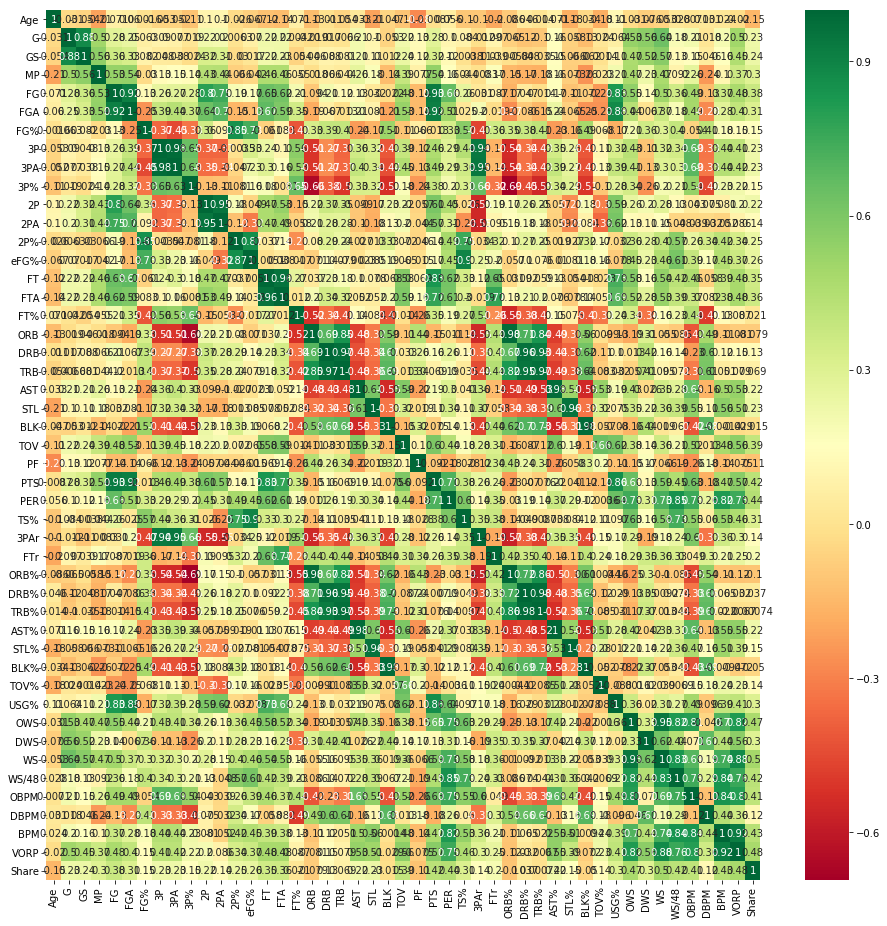

In [56]:
fig = plt.figure(figsize=(16, 16))
fig.set_facecolor('white')
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

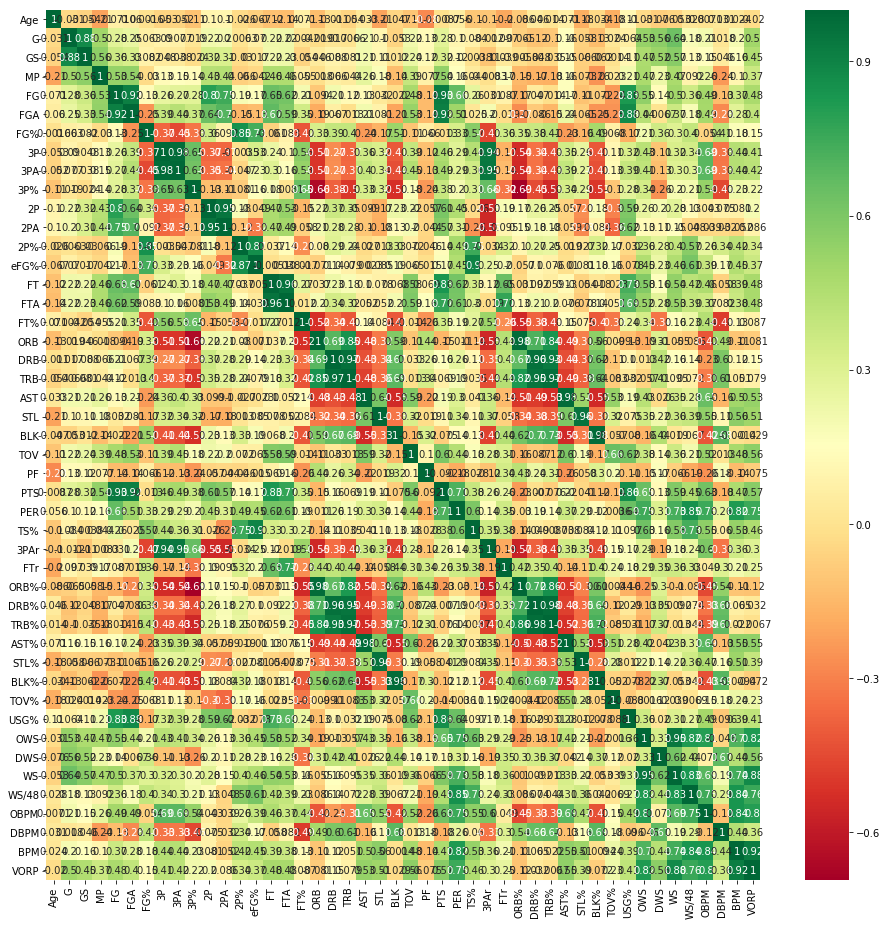

In [57]:
fig = plt.figure(figsize=(16, 16))
fig.set_facecolor('white')
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")

Text(0.5, 0, 'Award share')

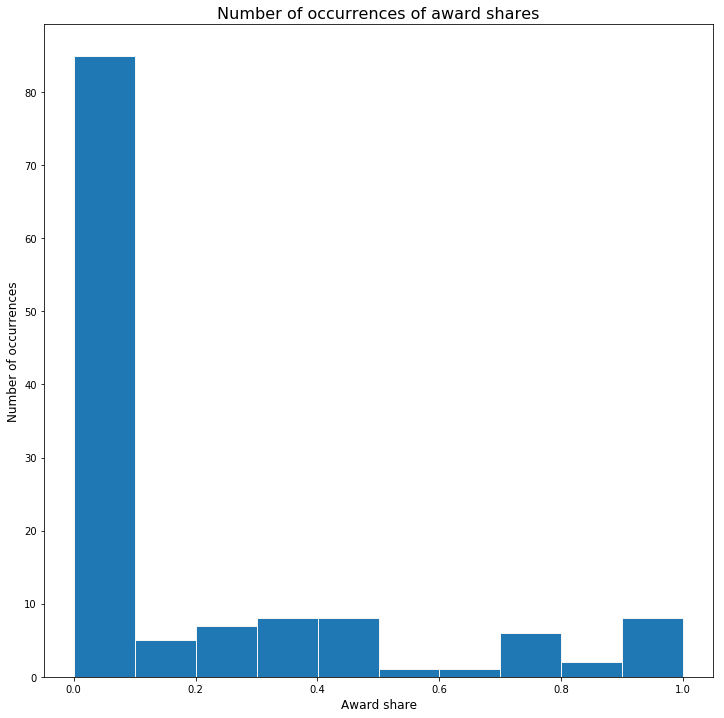

In [53]:
plt.figure(figsize=(12, 12))

plt.hist(data.Share, bins=10, edgecolor='#F5F5F5')
plt.title("Number of occurrences of award shares", size=16)
plt.ylabel("Number of occurrences", size=12)
plt.xlabel("Award share", size=12)